# Implementation of ML models for predicting the target value in the proteomics dataset

The dataset provided to me contains the protein-expression values of 1317 proteins that had been collected at different time-points from 53 individuals/organisms. There are 150 samples(rows) and 1362 features that contain the protein expression values of 1317 different proteins, with details about the timepoints (G1 or G2 or G3) when it was collected, as well as sample-ID and ID of the Individuals/organisms. I observed that the number of samples are fewer than the number of features in the dataset. I have applied two approaches, 

a) two ML-models (1D-CNN and NN) considering all the features intact in the dataset. 

b) A feature selection method to reduce the number of features to the 50 highest scoring features based on a chi-square test, and then implementing the same two ML-models.

The results obtained from these two approaches intrigued me to further investigate how the 1317 protein expression values are correlated. Hence, I applied k-means clustering and Principal Component Analysis to show how the values are clustered. I further conclude my report with future directions I would pursue to further improve the performance.


In [1]:
#Loading all the packages needed for the models 
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras import optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow.keras.metrics
import random
from keras.regularizers import l2
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from keras.constraints import maxnorm
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In the next part of the code,I am loading the dataset which contains the 150 rows(samples) and 1362
columns. Three columns in the features are non-numeric. Hence,I have converted the three
columns (Timepoint, ID, and SampleID) into numeric values using the labelencoder function. The dataset is then divided into the training and the test datasets.


In [2]:
#Reading the csv file into pandas dataframe
data = pd.read_csv('InterviewQ.csv')
data = data.sample(frac=1).reset_index(drop=True)
data1 = pd.DataFrame(data, columns=['Timepoint'])
data2 = pd.DataFrame(data, columns=['ID'])
data3 = pd.DataFrame(data, columns=['SampleId'])

#Converting the non-numeric features to numeric features
labelencoder = LabelEncoder()
data1['Timepoint'] = labelencoder.fit_transform(data1['Timepoint'])
data['Timepoint'] = data1['Timepoint']
data2['ID'] = labelencoder.fit_transform(data2['ID'])
data['ID'] = data2['ID']
data3['SampleId'] = labelencoder.fit_transform(data3['SampleId'])
data['SampleId'] = data3['SampleId']

#Storing all the features together in X

X = data.loc[:, data.columns != 'Target']
#Storing the target column i.e. label as y
y = data.iloc[:,2]




In [3]:
#Splitting the dataset into training and testing set where training set is 0.8 of the dataset and
#test set is 0.2 of the dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Standardisation of the features data by computing mean and then scaling it to the variance
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


I have implemented the 1-D convolutional neural network architecture where the training data is
read with kernel_size =1 and filters = 64. The second layer flattens the model, which is then passed through 3 hidden layers with the RELU activation function,and fourth hidden layer with 1 neuron. The model is compiled with adam optimizer and MSE loss.

In [4]:
def convolutional_neural_network(x, y,Xtest,ytest):
    print("Hyper-parameter values:\n")
    print('Momentum Rate =',momentum_rate,'\n')
    print('learning rate =',learning_rate,'\n')
    print('Number of neurons =',neurons,'\n')
    X = tf.constant(x.to_numpy())
    y = tf.constant(y.to_numpy())
    X = tf.expand_dims(X,axis=2)
    Xtest = tf.constant(Xtest.to_numpy())
    ytest = tf.constant(ytest.to_numpy())
    Xtest = tf.expand_dims(Xtest,axis=2)
    model = Sequential()
    model.add(Conv1D(input_shape=(X.shape[1], X.shape[2]),activation='relu',kernel_size = 1,filters = 64))
    model.add(Flatten())
    model.add(Dense(neurons,activation='relu')) # first hidden layer
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam',metrics=['mae','mse'])
    history = model.fit(X, y, validation_split=0.2, epochs=10)
    model.evaluate(Xtest, ytest, verbose=0)
    predictions = model.predict(Xtest)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('1-D CNN model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('1-D CNN model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('1-D CNN model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return predictions




I am running the convolutional neural network on training set and evaluating it based on the test
set with ‘n’ different combinations of the three hyperparameters (momentum_rate, learning_rate,
and number of neurons).

Hyper-parameter values:

Momentum Rate = 0.2 

learning rate = 0.03 

Number of neurons = 36 

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 1s 8ms/sample - loss: 2355.0546 - mae: 36.5451 - mse: 2355.0547 - val_loss: 1110.5363 - val_mae: 27.4096 - val_mse: 1110.5363
Epoch 2/10
96/96 [==============================] - 0s 2ms/sample - loss: 1169.9096 - mae: 27.7152 - mse: 1169.9097 - val_loss: 1197.7933 - val_mae: 30.4700 - val_mse: 1197.7933
Epoch 3/10
96/96 [==============================] - 0s 2ms/sample - loss: 1127.6476 - mae: 28.9547 - mse: 1127.6476 - val_loss: 1103.1547 - val_mae: 29.3222 - val_mse: 1103.1547
Epoch 4/10
96/96 [==============================] - 0s 1ms/sample - loss: 852.4434 - mae: 25.5343 - mse: 852.4434 - val_loss: 875.5039 - val_mae: 26.4967 - val_mse: 875.5039
Epoch 5/10
96/96 [==============================] - 0s 1ms/sample - loss: 670.8450 - mae: 21.6973 - mse: 670.8450 - val_loss: 806.9385 - val_mae: 24.6388

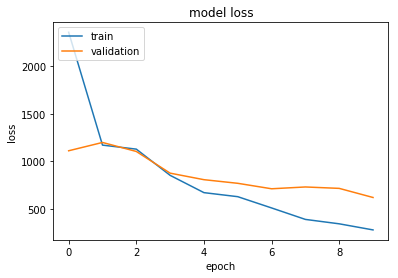

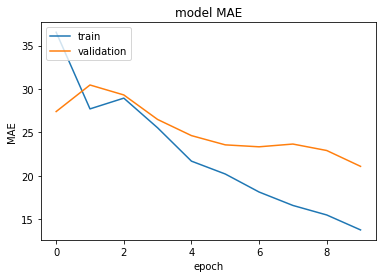

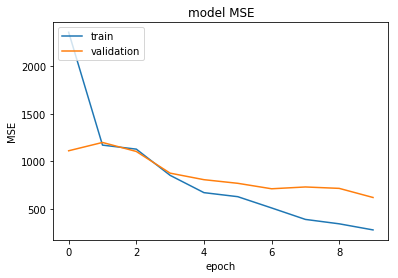

[[-29.8332  ]
 [-41.53239 ]
 [ -8.415061]
 [-57.81986 ]
 [-65.41145 ]
 [-49.308384]
 [-55.41685 ]
 [-36.413555]
 [-42.668716]
 [-34.913574]
 [-71.38997 ]
 [-11.247013]
 [-72.20397 ]
 [-30.329811]
 [-47.443146]
 [-53.364304]
 [-65.9784  ]
 [-36.388622]
 [-65.346054]
 [-33.75842 ]
 [-57.63654 ]
 [-75.25243 ]
 [-27.616808]
 [-64.80265 ]
 [-26.102411]
 [-33.516174]
 [-52.088276]
 [-26.15898 ]
 [-62.669586]
 [-36.439655]]


In [5]:
n = 1 #Substituting value of n for experimenting with different combinations of the hyperparameters

for k in range(n):
    momentum_rate = round(random.uniform(0.2,0.4),2)
    learning_rate = round(random.uniform(0,0.1),2)
    neurons = random.randint(30,50)
    print(convolutional_neural_network(X_train,y_train,X_test,y_test))


I have implemented the neural network with 3 different layers (first layer with 12 neurons,intialising the weights using normal distribution and relu activation function; second layer with 20 neurons and relu activation function; third layer with 1 neuron and linear function) and compiled with adam optimizer and ‘mse’ loss.I have trained the model on 0.8 of training dataset and validated it using 0.2 of the training data.The model is then evaluated using the test dataset and predictions are returned for each of the test samples.

In [6]:
# Function for Neural Network Model
def neural_network_model(X,Y,Xtest,ytest):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu',kernel_initializer='normal'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
    history = model.fit(X,Y,validation_split=0.2,epochs=10)
    model.evaluate(Xtest, ytest, verbose=0)
    predictions = model.predict(Xtest)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('NN model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('NN model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('NN model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return predictions




I am running the neural network on training set and evaluating it based on the test set with 'n' different combinations of two hyperparameters(momentum_rate and learning_rate).

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 0s 5ms/sample - loss: 2931.0846 - mse: 2931.0847 - mae: 43.2117 - val_loss: 2444.6609 - val_mse: 2444.6609 - val_mae: 37.4409
Epoch 2/10
96/96 [==============================] - 0s 172us/sample - loss: 2897.3682 - mse: 2897.3682 - mae: 42.9612 - val_loss: 2434.1892 - val_mse: 2434.1892 - val_mae: 37.3686
Epoch 3/10
96/96 [==============================] - 0s 276us/sample - loss: 2872.6410 - mse: 2872.6409 - mae: 42.7679 - val_loss: 2422.7727 - val_mse: 2422.7727 - val_mae: 37.2622
Epoch 4/10
96/96 [==============================] - 0s 232us/sample - loss: 2853.1389 - mse: 2853.1389 - mae: 42.5946 - val_loss: 2412.2542 - val_mse: 2412.2542 - val_mae: 37.1448
Epoch 5/10
96/96 [==============================] - 0s 265us/sample - loss: 2834.6447 - mse: 2834.6448 - mae: 42.4130 - val_loss: 2403.3186 - val_mse: 2403.3186 - val_mae: 37.0280
Epoch 6/10
96/96 [==============================] - 0s 276

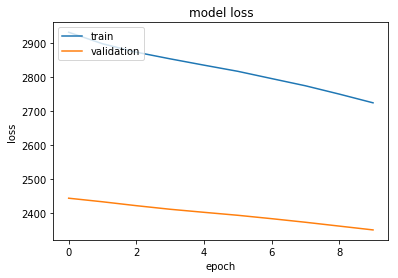

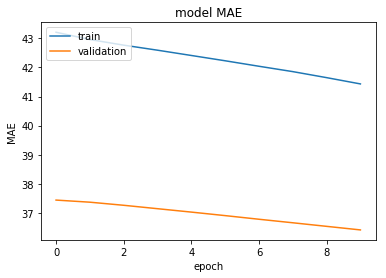

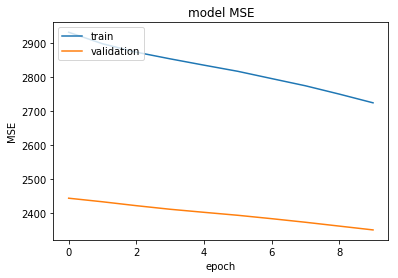

[[-0.96935964]
 [-1.0818629 ]
 [-0.06097657]
 [-1.1595367 ]
 [-0.12052178]
 [-1.0516487 ]
 [-1.4308594 ]
 [-0.53215075]
 [ 0.01317823]
 [ 0.00860178]
 [-3.7785246 ]
 [ 0.08581725]
 [-5.8248057 ]
 [-0.7221359 ]
 [-1.3771547 ]
 [-0.74327487]
 [-1.9263809 ]
 [-0.98547304]
 [-3.0555313 ]
 [-0.4456339 ]
 [-0.93531954]
 [-0.84593236]
 [ 0.10151184]
 [-1.2885634 ]
 [-0.18498625]
 [-2.1174397 ]
 [-1.1887211 ]
 [-0.979962  ]
 [-1.6005384 ]
 [-0.94113255]]


In [7]:
#Substituting value of n for experimenting with different combinations of the hyperparameters
n = 1
for k in range(n):
    momentum_rate = round(random.uniform(0.5,0.9),2)
    learning_rate = round(random.uniform(0,0.1),2)
    print(neural_network_model(X_train,y_train,X_test,y_test))

To improve the performance of the models,I am reducing the number of features of the dataset by
using feature selection approach where I am selecting the top 50 highest scoring features by using
SelectKbest function from the X;and allocating it as X_new and using it for training the two
models,namely 1D-CNN and NN.

In [8]:
from sklearn.feature_selection import chi2

Re-reading the features and labels just to make sure the right dataset is read in !

In [9]:
X = data.loc[:, data.columns != 'Target']
y = data.iloc[:,2]

SelectKbest function is a class in the sklearn.feature_selection module which uses a chi-square test to
determine the k highest scoring features. It removes all other features except the top k ones in the new dataframe X_new.

In [10]:
X_new = pd.DataFrame(SelectKBest(chi2, k=50).fit_transform(X, y))

In [11]:
#Splitting the new transformed features and label dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
X_train.shape
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


For tuning the model,I have tried different combinations of 3 hyperparameters and tested the 1-
D CNN model with n combinations at a time. In the next few steps,I am running the 1-D CNN
on the new training and test dataset with reduced features with n possible combinations of the 3
hyperparameters.

Hyper-parameter values:

Momentum Rate = 0.34 

learning rate = 0.07 

Number of neurons = 42 

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 1s 6ms/sample - loss: 2580.5120 - mae: 40.0257 - mse: 2580.5120 - val_loss: 3461.1868 - val_mae: 49.1188 - val_mse: 3461.1868
Epoch 2/10
96/96 [==============================] - 0s 188us/sample - loss: 2469.2705 - mae: 38.7375 - mse: 2469.2705 - val_loss: 3301.6423 - val_mae: 47.7912 - val_mse: 3301.6423
Epoch 3/10
96/96 [==============================] - 0s 304us/sample - loss: 2313.3108 - mae: 36.9591 - mse: 2313.3108 - val_loss: 3082.4561 - val_mae: 46.0108 - val_mse: 3082.4561
Epoch 4/10
96/96 [==============================] - 0s 361us/sample - loss: 2109.0351 - mae: 34.6377 - mse: 2109.0352 - val_loss: 2799.6223 - val_mae: 43.7890 - val_mse: 2799.6223
Epoch 5/10
96/96 [==============================] - 0s 316us/sample - loss: 1873.1402 - mae: 32.1485 - mse: 1873.1403 - val_loss: 2450.0139 - 

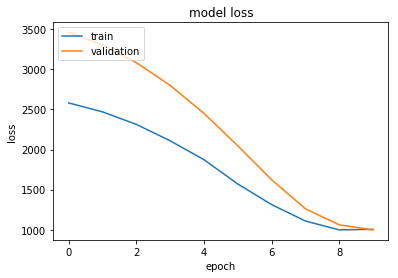

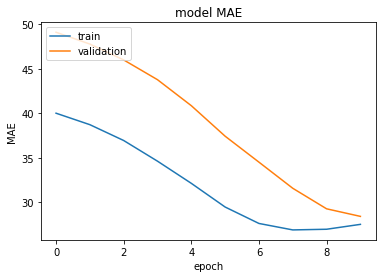

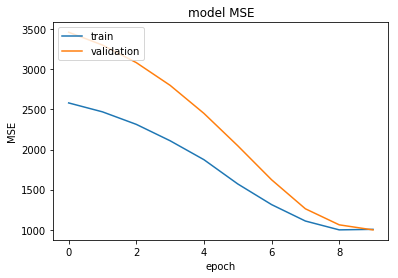

[[-49.578884]
 [-56.44011 ]
 [-50.707493]
 [-62.838295]
 [-52.66229 ]
 [-50.45318 ]
 [-61.1453  ]
 [-37.737312]
 [-58.317818]
 [-46.927696]
 [-42.162857]
 [-49.45263 ]
 [-47.78083 ]
 [-41.247272]
 [-44.065125]
 [-49.972908]
 [-72.00894 ]
 [-45.88617 ]
 [-41.185966]
 [-48.322823]
 [-51.95022 ]
 [-53.41771 ]
 [-49.54447 ]
 [-56.009727]
 [-49.163353]
 [-57.35144 ]
 [-69.17267 ]
 [-43.988308]
 [-50.58377 ]
 [-34.019745]]


In [12]:
n = 1 #Changing n for higher iterations of hyperparamater tuning

for k in range(n):
    momentum_rate = round(random.uniform(0.2,0.4),2)
    learning_rate = round(random.uniform(0,0.1),2)
    neurons = random.randint(30,50)
    print(convolutional_neural_network(X_train,y_train,X_test,y_test))

For tuning the model, I have tried different combinations of hyperparameters and tested the NN
model with n combinations at a time. In the next few steps, I am running the NN on the new training
and test dataset with reduced features with n possible combinations of the 2 hyperparameters.

Train on 96 samples, validate on 24 samples
Epoch 1/10
96/96 [==============================] - 0s 4ms/sample - loss: 2602.2218 - mse: 2602.2217 - mae: 40.2470 - val_loss: 3558.3223 - val_mse: 3558.3223 - val_mae: 49.9945
Epoch 2/10
96/96 [==============================] - 0s 168us/sample - loss: 2598.0058 - mse: 2598.0059 - mae: 40.2077 - val_loss: 3555.7910 - val_mse: 3555.7910 - val_mae: 49.9729
Epoch 3/10
96/96 [==============================] - 0s 211us/sample - loss: 2594.2122 - mse: 2594.2122 - mae: 40.1708 - val_loss: 3553.0518 - val_mse: 3553.0518 - val_mae: 49.9496
Epoch 4/10
96/96 [==============================] - 0s 283us/sample - loss: 2590.3647 - mse: 2590.3645 - mae: 40.1325 - val_loss: 3549.9934 - val_mse: 3549.9934 - val_mae: 49.9233
Epoch 5/10
96/96 [==============================] - 0s 252us/sample - loss: 2586.8596 - mse: 2586.8596 - mae: 40.0946 - val_loss: 3546.7527 - val_mse: 3546.7527 - val_mae: 49.8949
Epoch 6/10
96/96 [==============================] - 0s 286

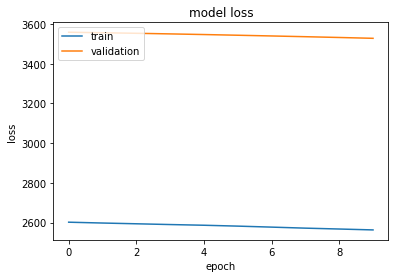

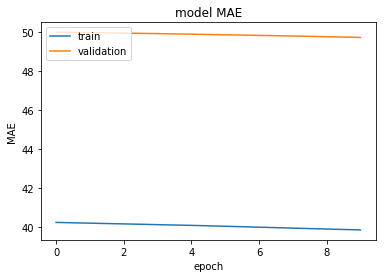

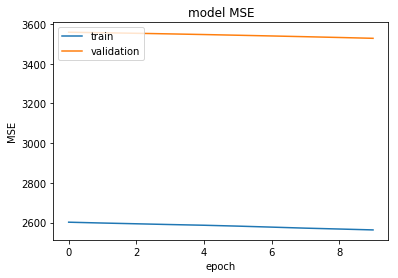

[[-0.50044656]
 [-0.60803694]
 [-0.5777083 ]
 [-1.2489016 ]
 [-0.26430726]
 [-0.65730506]
 [-0.95947903]
 [-0.3627973 ]
 [-0.75452656]
 [-0.13195994]
 [-0.4775795 ]
 [-0.5520317 ]
 [-0.37133035]
 [-0.48513812]
 [-0.35579684]
 [-0.5362881 ]
 [-0.7718471 ]
 [-0.34756067]
 [-0.383131  ]
 [-0.7281958 ]
 [-0.74676865]
 [-0.45652404]
 [-0.5074519 ]
 [-1.0722072 ]
 [-0.44463843]
 [-0.6282498 ]
 [-1.1072421 ]
 [-0.5390619 ]
 [-0.7296764 ]
 [-0.4749087 ]]


In [13]:
for k in range(n):
    momentum_rate = round(random.uniform(0.5,0.9),2)
    learning_rate = round(random.uniform(0,0.1),2)
    neurons = random.randint(30,50)
    print(neural_network_model(X_train,y_train,X_test,y_test))


# Results from K-mean clustering and PCA analysis on the dataset

I have utilised an R script to perform k-means clustering and Principal Component Analysis on the
dataset. The Rscript for these plots have been uploaded in the .zip file as Clustering_Rscript.R.
k-mean clustering and Principal Component Analysis are dimensionality reduction techniques
which help to obtain critical insights from complex dimensional data.

The Figure 1 and Figure 2 shows the clustering obtained from k-means clustering with k= 50 and k = 3.Figure 3 contains the PCA plot.From the three figures,I observed very few outliers and the majority of the features (protein expression data) appear to be highly correlated.The figures have been enclosed as seperate figures in the .zip file. Some of the approaches to find the measure of correlation would be Variance Inflation Factor and a correlation plot.





# Conclusions from the study

1.I was able to predict the target label using regression approach via Neural network and 1D-CNN.The prediction got better with increase in epochs.

2.The metrics included were MAE(Mean absolute error),MSE(Mean squared error).Based on the plots,the MAE and MSE values reduced with increase in epochs,which suggests model performance improved with each epoch.

3.Based on the plots,I observed 1-D CNN architecture performed better than Neural Network in different combinations of hyperparameters.

4.Feature reduction didnt improve both the models significantly.

4.Other model approaches that could be used include Random forests and Decision trees for regression. 

5.To improve the performance of the model, the following steps could be used:
a) Increasing the dataset size by oversampling or collecting more data. 

b) Plotting how model performance varies with hyperparameter changes, and then selecting for
the best combination to optimize the models. 

c)Exploring more how the different features are correlated in the dataset and removing redundant ones.


